In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
%matplotlib inline

df = pd.read_csv('original_1_year_data.csv')

df["TITLE"] = df['TITLE'].map(str) + df['BODY'].map(str)

# giving each flair a number
df['category_id'] = df['FLAIR'].factorize()[0]
category_id_df = df[['FLAIR', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'FLAIR']].values)

In [11]:
print(df.head(10))

                                               TITLE  \
0  Randians  what are your tips/tricks for waking...   
1  Just Another Immigrant (2018) | Official Trail...   
2  Have You Heard This Anti-Racism Rap from Aruna...   
3  What is an effective strategy to counter fake ...   
4     Passwords can be changed  biometrics can't!nan   
5  Sharp drop in smoking tobacco in India  says W...   
6          Has India lost its spiritual heritage?nan   
7                            Karma policing[removed]   
8  New Football Bloc for South West Asia Launched...   
9  RainsEastern rajasthan had pre monsoon rains g...   

                                                BODY           FLAIR  \
0  Only solution to waking up early is to sleep e...        AskIndia   
1                                                NaN   Non-Political   
2                                                NaN   Non-Political   
3                                          [removed]        AskIndia   
4                      

AskIndia  =  16053
Non-Political  =  28442
Politics  =  25283
Policy/Economy  =  3658
Sports  =  2392
Food  =  1246
Science/Technology  =  4923
Business/Finance  =  7452
Photography  =  2501
Reddiquette  =  2920
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94870 entries, 0 to 94869
Data columns (total 4 columns):
TITLE          94870 non-null object
BODY           24236 non-null object
FLAIR          94870 non-null object
category_id    94870 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


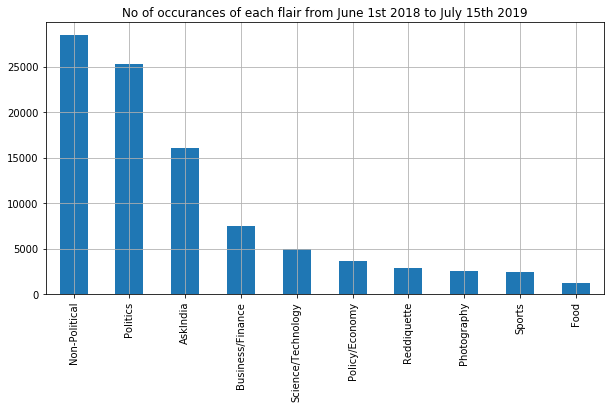

In [12]:
plt.figure(figsize=(10,5))
df.FLAIR.value_counts().plot(kind='bar', legend=False, grid=True)
plt.title("No of occurances of each flair from June 1st 2018 to July 15th 2019")

allowed_tags = ['AskIndia','Non-Political','Politics','Policy/Economy','Sports','Food','Science/Technology','Business/Finance','Photography','Reddiquette']

for i in allowed_tags:
    print(i, " = " ,int(df.FLAIR.str.count(i).sum()))

df.info()



In [13]:
# dividing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.TITLE, df.FLAIR, test_size=0.2, random_state = 1)

In [14]:
# timepass

import pandas as pd 
  
data = [["Assam floods: Let us stand by our state in these dire times"]] 
  
# Create the pandas DataFrame 
faltu = pd.DataFrame(data, columns = ['TITLE']) 
  
# print dataframe. 
faltu

,TITLE
0,Assam floods: Let us stand by our state in the...


accuracy 0.5941288078423105
                    precision    recall  f1-score   support

          AskIndia       0.55      0.72      0.62      3214
  Business/Finance       0.60      0.60      0.60      1448
              Food       0.72      0.31      0.44       258
     Non-Political       0.59      0.51      0.55      5668
       Photography       0.72      0.27      0.40       524
    Policy/Economy       0.52      0.11      0.18       742
          Politics       0.61      0.86      0.71      5041
       Reddiquette       0.44      0.01      0.03       618
Science/Technology       0.60      0.28      0.38       975
            Sports       0.73      0.60      0.66       486

          accuracy                           0.59     18974
         macro avg       0.61      0.43      0.46     18974
      weighted avg       0.59      0.59      0.57     18974



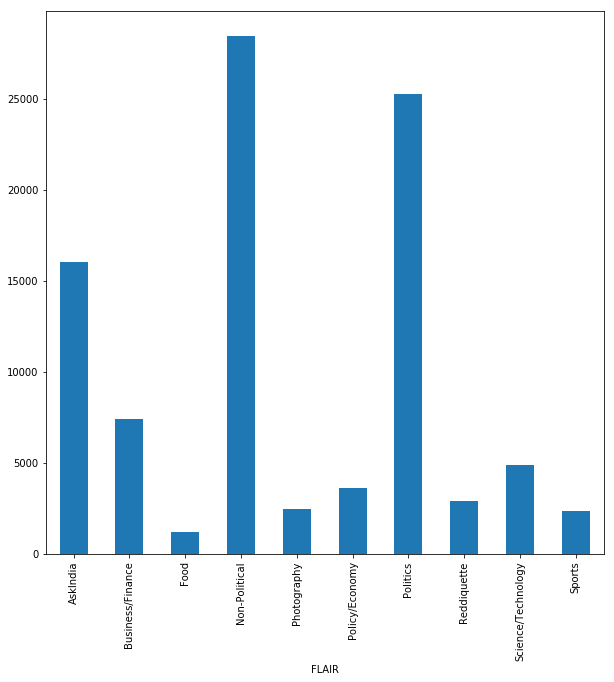

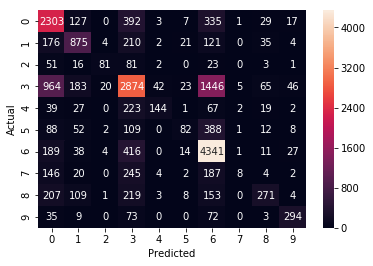

In [15]:
# linear svm

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
df.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



In [16]:
print(sgd.predict(faltu))

['AskIndia']


accuracy 0.5654579951512596
                    precision    recall  f1-score   support

          AskIndia       0.54      0.68      0.60      3214
  Business/Finance       0.69      0.50      0.58      1448
              Food       0.77      0.26      0.38       258
     Non-Political       0.47      0.69      0.56      5668
       Photography       0.69      0.24      0.36       524
    Policy/Economy       0.55      0.14      0.23       742
          Politics       0.70      0.64      0.67      5041
       Reddiquette       0.37      0.03      0.06       618
Science/Technology       0.59      0.20      0.30       975
            Sports       0.78      0.39      0.52       486

          accuracy                           0.57     18974
         macro avg       0.62      0.38      0.43     18974
      weighted avg       0.59      0.57      0.55     18974



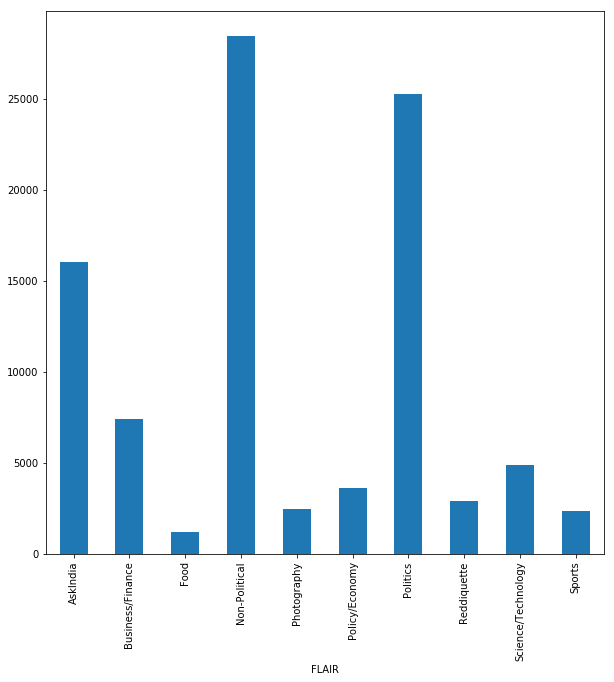

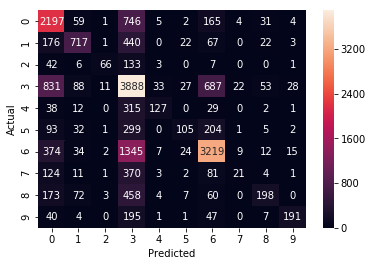

In [17]:
# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=10)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
df.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [18]:
print(sgd.predict(faltu))

['Non-Political']


accuracy 0.554442921893117


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                    precision    recall  f1-score   support

          AskIndia       0.59      0.56      0.58      3214
  Business/Finance       0.87      0.40      0.54      1448
              Food       1.00      0.01      0.02       258
     Non-Political       0.46      0.72      0.56      5668
       Photography       1.00      0.01      0.02       524
    Policy/Economy       0.00      0.00      0.00       742
          Politics       0.64      0.78      0.70      5041
       Reddiquette       0.00      0.00      0.00       618
Science/Technology       0.87      0.09      0.17       975
            Sports       0.94      0.06      0.11       486

          accuracy                           0.55     18974
         macro avg       0.64      0.26      0.27     18974
      weighted avg       0.58      0.55      0.50     18974



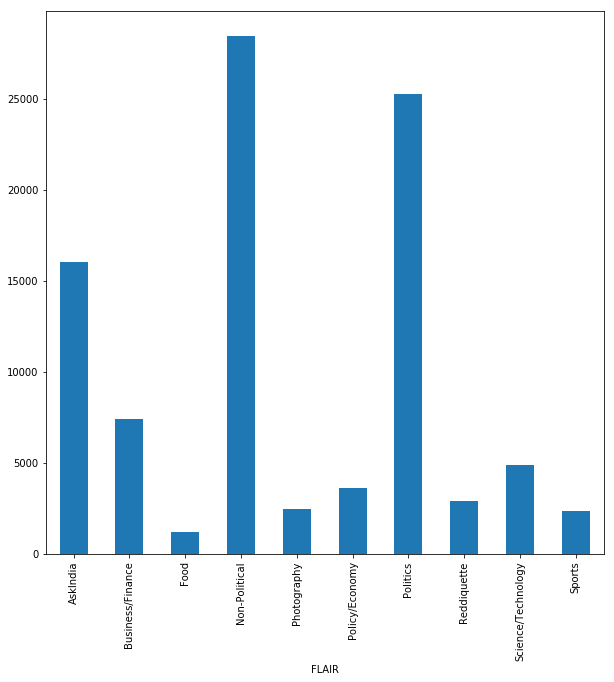

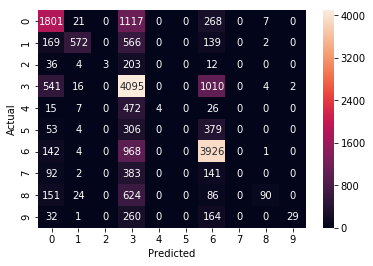

In [19]:
# NAIVE- BAYES

from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', TfidfVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
df.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [20]:
print(sgd.predict(faltu))

['Non-Political']


In [ ]:
# .     using resampling

In [22]:
from sklearn.model_selection import train_test_split

#df2 = df[df.FLAIR != "Politics"]
#df2 = df2[df.FLAIR != "Non-Political"]
#df2 = df2[df.FLAIR != "AskIndia"]
X_train, X_test, y_train, y_test = train_test_split(df.TITLE, df.FLAIR, test_size=0.16, random_state = 1)

In [23]:
from sklearn.utils import resample

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
to_reduce = X[X.FLAIR=='Non-Political']
minimum = X[X.FLAIR!='Non-Political']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 3500, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
downsampled.FLAIR.value_counts()

Politics              21269
AskIndia              13493
Business/Finance       6272
Science/Technology     4148
Non-Political          3500
Policy/Economy         3058
Reddiquette            2418
Photography            2091
Sports                 2012
Food                   1040
Name: FLAIR, dtype: int64

In [24]:
from sklearn.utils import resample

# separate minority and majority classes
to_reduce = downsampled[downsampled.FLAIR=='Politics']
minimum = downsampled[downsampled.FLAIR!='Politics']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 3000, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
downsampled.FLAIR.value_counts()

AskIndia              13493
Business/Finance       6272
Science/Technology     4148
Non-Political          3500
Policy/Economy         3058
Politics               3000
Reddiquette            2418
Photography            2091
Sports                 2012
Food                   1040
Name: FLAIR, dtype: int64

In [25]:
from sklearn.utils import resample

# separate minority and majority classes
to_reduce = downsampled[downsampled.FLAIR=='AskIndia']
minimum = downsampled[downsampled.FLAIR!='AskIndia']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 2700, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
downsampled.FLAIR.value_counts()

Business/Finance      6272
Science/Technology    4148
Non-Political         3500
Policy/Economy        3058
Politics              3000
AskIndia              2700
Reddiquette           2418
Photography           2091
Sports                2012
Food                  1040
Name: FLAIR, dtype: int64

In [26]:
from sklearn.utils import resample

# separate minority and majority classes
to_reduce = downsampled[downsampled.FLAIR=='Business/Finance']
minimum = downsampled[downsampled.FLAIR!='Business/Finance']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 2500, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
downsampled.FLAIR.value_counts()

Science/Technology    4148
Non-Political         3500
Policy/Economy        3058
Politics              3000
AskIndia              2700
Business/Finance      2500
Reddiquette           2418
Photography           2091
Sports                2012
Food                  1040
Name: FLAIR, dtype: int64

In [27]:
from sklearn.utils import resample

# separate minority and majority classes
to_reduce = downsampled[downsampled.FLAIR=='Science/Technology']
minimum = downsampled[downsampled.FLAIR!='Science/Technology']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 2500, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
downsampled.FLAIR.value_counts()

Non-Political         3500
Policy/Economy        3058
Politics              3000
AskIndia              2700
Science/Technology    2500
Business/Finance      2500
Reddiquette           2418
Photography           2091
Sports                2012
Food                  1040
Name: FLAIR, dtype: int64

In [28]:
from sklearn.utils import resample

# separate minority and majority classes
to_reduce = downsampled[downsampled.FLAIR=='Policy/Economy']
minimum = downsampled[downsampled.FLAIR!='Policy/Economy']

# downsample majority
downsampled = resample(to_reduce,
                                replace = False, # sample without replacement
                                n_samples = 2500, # match minority n
                                random_state = 27) # reproducible results
#print(downsampled)
# combine minority and downsampled majority
downsampled = pd.concat([downsampled, minimum])
print(downsampled.FLAIR.value_counts())





Non-Political         3500
Politics              3000
AskIndia              2700
Policy/Economy        2500
Science/Technology    2500
Business/Finance      2500
Reddiquette           2418
Photography           2091
Sports                2012
Food                  1040
Name: FLAIR, dtype: int64


In [ ]:
# performing ML on downsampled

accuracy 0.49993412384716734
                    precision    recall  f1-score   support

          AskIndia       0.57      0.63      0.60      2560
  Business/Finance       0.47      0.63      0.54      1180
              Food       0.36      0.66      0.46       206
     Non-Political       0.66      0.21      0.32      4553
       Photography       0.26      0.73      0.38       410
    Policy/Economy       0.27      0.54      0.36       600
          Politics       0.74      0.67      0.70      4014
       Reddiquette       0.19      0.29      0.23       502
Science/Technology       0.33      0.49      0.39       775
            Sports       0.30      0.82      0.44       380

          accuracy                           0.50     15180
         macro avg       0.41      0.57      0.44     15180
      weighted avg       0.58      0.50      0.49     15180



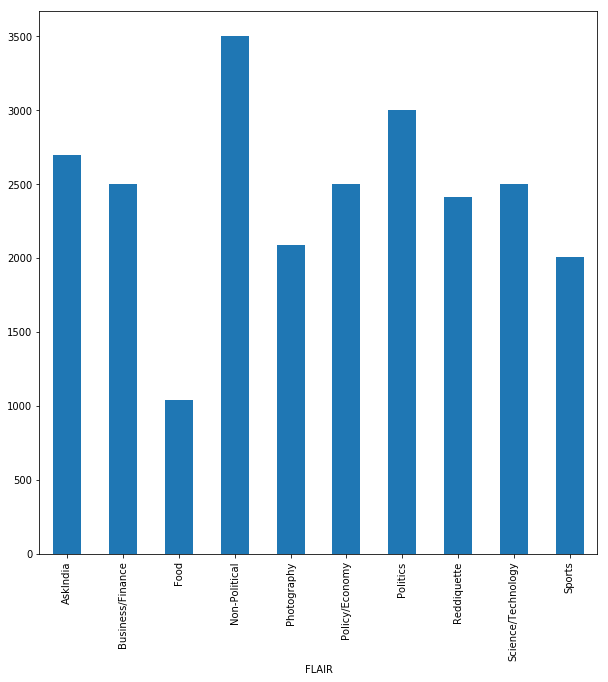

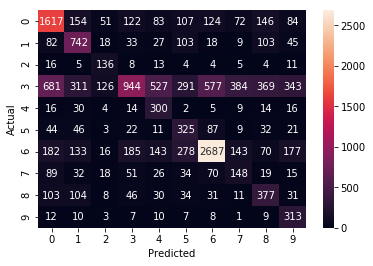

In [29]:
# linear svm
y_train = downsampled.FLAIR
X_train = downsampled.TITLE



from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
downsampled.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [30]:
print(sgd.predict(faltu))

['Sports']


accuracy 0.4600790513833992
                    precision    recall  f1-score   support

          AskIndia       0.50      0.61      0.55      2560
  Business/Finance       0.43      0.56      0.49      1180
              Food       0.38      0.41      0.39       206
     Non-Political       0.49      0.36      0.42      4553
       Photography       0.21      0.60      0.31       410
    Policy/Economy       0.23      0.39      0.28       600
          Politics       0.75      0.48      0.59      4014
       Reddiquette       0.15      0.24      0.18       502
Science/Technology       0.30      0.33      0.31       775
            Sports       0.50      0.62      0.55       380

          accuracy                           0.46     15180
         macro avg       0.39      0.46      0.41     15180
      weighted avg       0.51      0.46      0.47     15180



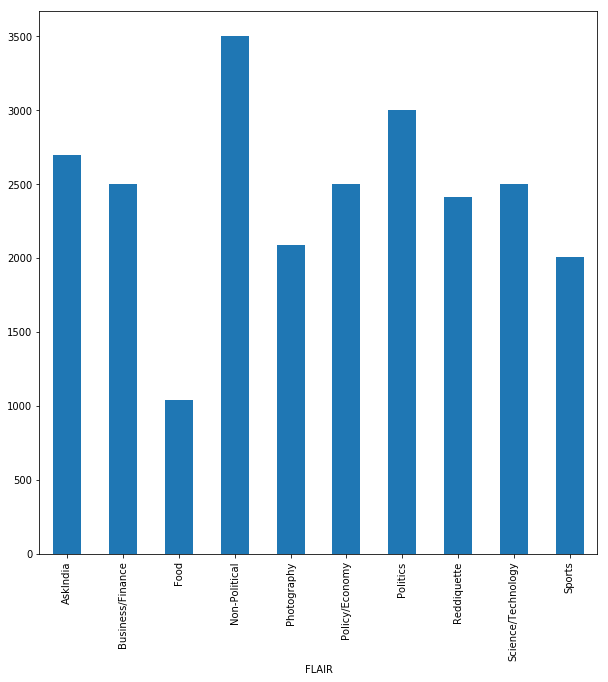

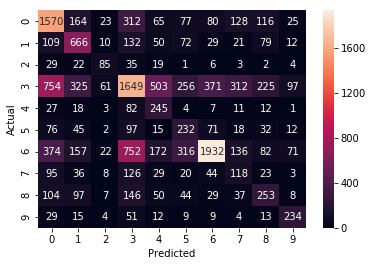

In [31]:
# Random Forest classifier
y_train = downsampled.FLAIR
X_train = downsampled.TITLE



from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', RandomForestClassifier(n_estimators=10)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
downsampled.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [32]:
print(sgd.predict(faltu))

['Politics']


accuracy 0.5630434782608695
                    precision    recall  f1-score   support

          AskIndia       0.46      0.78      0.58      2560
  Business/Finance       0.68      0.55      0.61      1180
              Food       0.85      0.19      0.31       206
     Non-Political       0.56      0.48      0.52      4553
       Photography       0.57      0.50      0.53       410
    Policy/Economy       0.32      0.49      0.39       600
          Politics       0.76      0.63      0.69      4014
       Reddiquette       0.30      0.19      0.23       502
Science/Technology       0.48      0.40      0.44       775
            Sports       0.68      0.64      0.66       380

          accuracy                           0.56     15180
         macro avg       0.57      0.49      0.50     15180
      weighted avg       0.59      0.56      0.56     15180



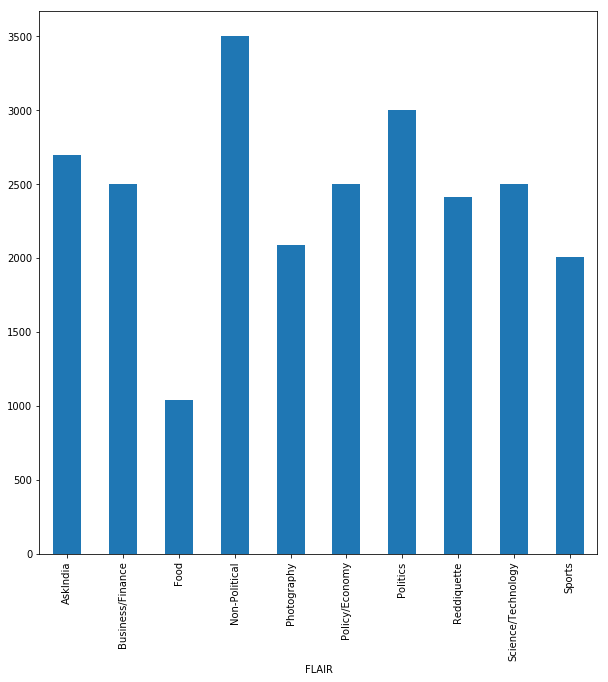

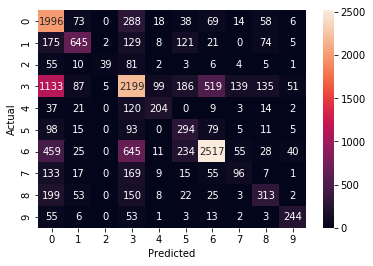

In [33]:
# NAIVE- BAYES
y_train = downsampled.FLAIR
X_train = downsampled.TITLE



from sklearn.naive_bayes import MultinomialNB

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB()),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))


from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))


import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(8,6))
downsampled.groupby('FLAIR').TITLE.count().plot.bar(ylim=0)
plt.show()


import seaborn as sns
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [34]:
print(sgd.predict(faltu))

['AskIndia']
